__Your name here__
<br>
Date: Mar. 4, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 20: Pendulum with RK methods</font></center>

## <font color=#46769B>Introduction</font>

While Euler's method is easy to implement for solving IVPs, but we saw that it had major shortcomings in terms of accuracy, requiring a large number of steps to achieve even a modest accuracy. Higher-order methods can overcome this difficulty, dramatically decreasing the number of steps needed.

The goals of this exercise are:
- Gain experience with second-order (and higher) methods for solving ODEs

Required reading:
- *Lesson 10: Second-order methods*


## <font color=#46769B>Exercise</font>

In Exercise 18, we considered a pendulum with equation of motion

$$\theta''(t) + \omega^2 \sin\theta(t) = 0 \, ,$$

which was solved numerically using Euler's method.  We will assume $\omega = 2\pi$ and an initial condition

$$\theta(0) = \theta_0 , \qquad \theta'(0) = 0 \, .$$ 

The goal here to repeat this exercise using higher-order explicit methods (RK2 and RK4).

## <font color=#46769B>Part (a)</font>

Write three codes:
- `midpoint_method(num_steps,theta_0)` that will perform the midpoint method for a given initial condition $\theta_0$ and $N$ number of steps given by `num_steps`.
- `Heun_method(num_steps,theta_0)` that will do the same for Heun's method.
- `RK4(num_steps,theta_0)` that will do the same for the (classic) RK4 method.

For each, take a fixed interval $[0,5]$ for $t$. Make a plot of $\theta(t)$ vs $t$ for $N=1000$ steps, with an initial condition $\theta_0 = 1$.

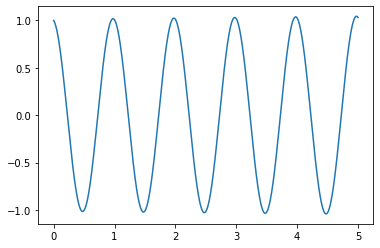

In [9]:

######## MID POINT METHOD#####

############################

import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0=0
tf=5

def f(t,y):
  y1,y2=y
  return np.array([y2,-omega**2*np.sin(y1)])

theta0=1
y0=np.array([0.01,0])
t0=0
tf=5
N=1000

t=np.linspace(t0,tf,N+1)
h=t[0]-t[1]
y=np.zeros((N+1,2))
y[0]=1




for i in range(N):
  ti=t[i]
  yi=y[i]
  y[i+1]=yi+f((ti+h/2),(yi+h/2*f(ti,yi))*h)

plt.plot(t,y[:,0])  




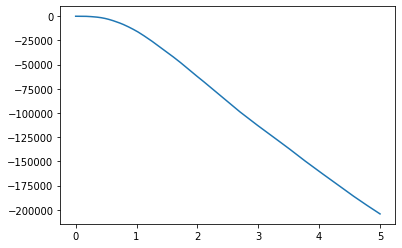

In [8]:
### HEUNS METHOD #############
##############################




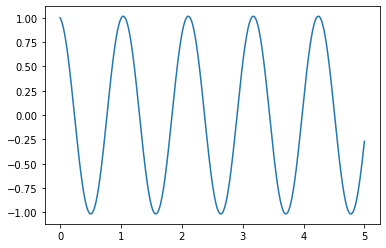

In [27]:

######## HEUNS METHOD #####

############################

import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0=0
tf=5

def f(t,y):
  y1,y2=y
  return np.array([y2,-omega**2*np.sin(y1)])

theta0=1
y0=np.array([0.01,0])
t0=0
tf=5
N=1000

t=np.linspace(t0,tf,N+1)
h=t[0]-t[1]
y=np.zeros((N+1,2))
y[0]=1

for i in range(N):
  ti=t[i]
  yi=y[i]
  y[i+1]=yi+h*((1/2)*(f(ti,yi) +f((ti+h),(yi+h*(f(ti,yi))))))

plt.plot(t,y[:,0])  




[[0.01       0.01      ]
 [0.01758692 0.02883669]
 [0.03061671 0.07073156]
 ...
 [3.04201266 3.27618366]
 [3.04201266 3.27618366]
 [3.04201266 3.27618366]]


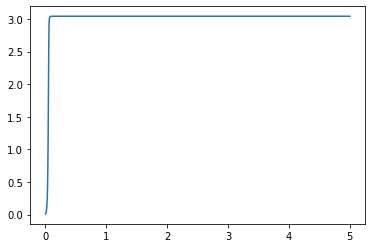

In [14]:
#### RK4 METHOD####
####################


N=1000
import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0=0
tf=5

def f(t,y):
  y1,y2=y
  return np.array([y2,-omega**2*np.sin(y1)])

theta0=1
y0=np.array([0.01,0])
t0=0
tf=5
N=1000

t=np.linspace(t0,tf,N+1)
h=t[0]-t[1]
y=np.zeros((N+1,2))
y[0]=y0[0]

for i in range (N):
  ti=t[i]
  yi=y[i]
  y[i+1]=yi+h*((1/6)*f(ti,yi)+2*f(ti+(h/2),yi+(h/2)*f(ti,yi))+2*f(ti+(h/2),yi+(h/2)*(f(ti+(h/2),yi+(h/2*f(ti,yi)))))+f(ti+h,yi+h*f(ti,yi)+2*f(ti+(h/2),yi+(h/2)*f(ti,yi))+2*f(ti+(h/2),yi+(h/2)*(f(ti+(h/2),yi+(h/2*f(ti,yi)))))))
print(y)

plt.plot(t,y[:,0])  

## <font color=#46769B>Part (b)</font>

In Exercise 18, Euler's method required about $N \sim 10^7$ steps to converge for an initial condition $\theta_0 = 3$, with tolerance settings `atol = rtol = 1e-2`.

Using your code from part (a), determine the number of steps $N$ needed for each of the midpoint, Heun, and RK4 methods to converge within the same tolerance.  Make a plot of your final converged results for each method.



Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.


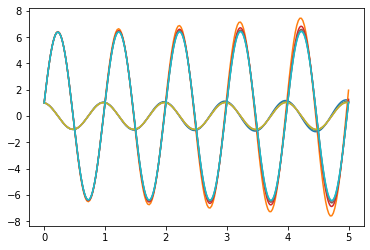

In [26]:
########### MID POINT METHOD #########|
####################################

import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0=0
tf=5

def f(t,y):
  y1,y2=y
  return np.array([y2,-omega**2*np.sin(y1)])
theta0=1
y0=np.array([theta0,0])
t0=0
tf=5

def MIDPOINT(N):
  t=np.linspace(t0,tf,N+1)
  h=t[0]-t[1]
  y=np.zeros((N+1,2))
  y[0]=1
  for i in range(N):
    ti=t[i]
    yi=y[i]
    y[i+1]=yi+f((ti+h/2),(yi+h/2*f(ti,yi))*h)
  return t,y

steps=100
t,y_old=MIDPOINT(steps)
not_converged_yet = True
while  not_converged_yet:
  # Try double steps
    steps = 2*steps
    print("Not converged yet. Trying",steps, "steps.")
    t, y_new = MIDPOINT(steps)
    not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=10**(-2),rtol=1e-2))
    y_old = y_new

    # Make a plot
    plt.plot(t,y_new,label=N)

## <font color=#46769B>Part (c)</font>

Here we repeat Exercise 18 (c) with our new methods. The goal is to determine numerically $T(\theta_0)$, that is, how the oscillation period depends on the initial displacement $\theta$.

Write a function `find_period(theta_0)` that will determine the period $T$ for a given initial condition $\theta_0$, using any *one* of the methods in parts (a) and (b) to solve for $\theta(t)$. Given your numerical solution for $\theta(t)$:

- Determine $T$ as the distance between two maxima. (In the solutions to Exercise 18, I showed how to determine $T$ as twice the distance between a maximum and minimum. Here I challenge you to *not* copy what I did, but write your own version if you haven't completed this part already.)

Next, make a plot of $T$ as a function of $\theta_0$ for 31 values of $\theta_0$ in `numpy.linspace(0.1,3.1,31)`.

Compare to the analytic approximation

$$ T(\theta_0) = \frac{2\pi}{\omega} \left( 1 + \frac{1}{16} \theta_0^2 + \frac{11}{3072} \theta_0^4 + \mathcal{O}(\theta_0^6) \right)$$

where the leading $1$ is the small-angle result. Plot this formula on your plot to check that it agrees with your results for small and medium values of $\theta_0$.